In [1]:
import pandas as pd

## Get measurements from CSV

In [2]:
sensor_readings = pd.read_csv("D:\Master\Thesis\Code\L-Town\measurements_LTown.csv", index_col = 0)

sensor_readings['Timestamp'] = pd.to_datetime(sensor_readings['Timestamp'])

# Extract entity ID and type
sensor_readings['entity_id'] = sensor_readings['sensor_id'].apply(lambda x: "_".join(x.split("_")[:2]))  # e.g., Node_1 or Pipe_12
sensor_readings['measurement_type'] = sensor_readings['sensor_type']  # demand, pressure, flow
sensor_readings['entity_type'] = sensor_readings['entity_id'].apply(lambda x: x.split("_")[0])  # Node or Pipe


In [3]:
sensor_readings["measurement_type"].unique()

array(['demand', 'flow', 'level', 'pressure'], dtype=object)

In [4]:
sensor_readings

,Timestamp,sensor_id,measurement,sensor_type,unique_id,entity_id,measurement_type,entity_type
0,2018-01-01 00:00:00,n1_demand,41.801667,demand,n1_demand_2018-01-01 00:00:00,n1_demand,demand,n1
1,2018-01-01 00:30:00,n1_demand,37.711667,demand,n1_demand_2018-01-01 00:30:00,n1_demand,demand,n1
2,2018-01-01 01:00:00,n1_demand,37.425000,demand,n1_demand_2018-01-01 01:00:00,n1_demand,demand,n1
3,2018-01-01 01:30:00,n1_demand,41.076667,demand,n1_demand_2018-01-01 01:30:00,n1_demand,demand,n1
4,2018-01-01 02:00:00,n1_demand,39.751667,demand,n1_demand_2018-01-01 02:00:00,n1_demand,demand,n1
...,...,...,...,...,...,...,...,...
5326075,2018-12-31 23:35:00,n769_pressure,48.330000,pressure,n769_pressure_2018-12-31 23:35:00,n769_pressure,pressure,n769
5326076,2018-12-31 23:40:00,n769_pressure,48.330000,pressure,n769_pressure_2018-12-31 23:40:00,n769_pressure,pressure,n769
5326077,2018-12-31 23:45:00,n769_pressure,48.360000,pressure,n769_pressure_2018-12-31 23:45:00,n769_pressure,pressure,n769
5326078,2018-12-31 23:50:00,n769_pressure,48.320000,pressure,n769_pressure_2018-12-31 23:50:00,n769_pressure,pressure,n769


In [5]:
# Nodes → demand
demands_df = sensor_readings[sensor_readings['measurement_type'] == 'demand']
demands_all = demands_df.pivot_table(index='Timestamp', columns=['entity_type'], values='measurement')

In [6]:
demands_all

entity_type,n1,n10,n11,n13,n16,n17,n18,n19,n2,n20,...,n40,n41,n42,n43,n44,n45,n6,n7,n8,n9
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,41.801667,42.246667,252.763333,169.983333,61.173333,268.900000,46.381667,95.145000,112.651667,106.310000,...,210.528333,89.528333,133.441667,74.175000,25.051667,217.703333,177.465000,255.903333,231.466667,262.408333
2018-01-01 00:30:00,37.711667,42.080000,272.173333,101.300000,40.010000,204.651667,42.625000,75.115000,83.136667,66.536667,...,151.203333,83.045000,123.778333,51.951667,18.488333,136.255000,135.065000,210.073333,126.196667,212.028333
2018-01-01 01:00:00,37.425000,23.261667,189.163333,91.825000,36.916667,196.053333,23.851667,51.430000,46.375000,56.936667,...,126.426667,54.695000,81.520000,48.276667,10.311667,116.596667,129.391667,165.678333,116.610000,133.613333
2018-01-01 01:30:00,41.076667,22.885000,189.800000,43.513333,34.856667,145.695000,28.040000,32.316667,51.645000,44.796667,...,57.490000,42.215000,62.923333,33.740000,11.483333,91.736667,96.156667,120.151667,115.490000,92.256667
2018-01-01 02:00:00,39.751667,14.896667,126.500000,53.878333,34.081667,90.496667,13.090000,17.340000,40.926667,41.073333,...,91.510000,48.531667,72.335000,23.166667,9.100000,84.108333,59.726667,54.741667,76.676667,99.265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:30:00,214.273333,110.821667,514.861667,238.323333,87.590000,413.788333,62.458333,115.005000,130.740000,155.675000,...,294.626667,144.903333,215.978333,161.385000,29.076667,318.801667,273.091667,534.883333,394.745000,442.275000
2018-12-31 22:00:00,115.246667,105.376667,393.791667,217.011667,58.318333,468.473333,52.306667,97.768333,170.505000,108.668333,...,336.743333,111.061667,165.533333,93.121667,37.916667,222.533333,309.181667,431.168333,322.828333,519.708333
2018-12-31 22:30:00,100.130000,93.946667,463.678333,176.165000,115.300000,317.785000,57.188333,92.020000,215.485000,142.785000,...,350.755000,149.801667,223.280000,145.436667,47.916667,292.401667,209.728333,262.151667,309.735000,506.728333


### Separate data by feature

## Imputation

### Split train/val, and scale

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
import joblib

def split_scale(measurements, feature, cluster):

    # Step 1: Split the full data into train and validation sets
    X_train_full, X_val_full = train_test_split(measurements, test_size=0.2, shuffle = False, random_state=42)

    scaler = StandardScaler()

    # Fit and transform training data
    X_train_full_scaled = X_train_full.copy()
    X_train_full_scaled = scaler.fit_transform(X_train_full)
    X_train_full_scaled = pd.DataFrame(X_train_full_scaled, columns=X_train_full.columns, index=X_train_full.index)

    # Save scaler with specific name for later rescaling
    joblib.dump(scaler, f"{feature}_scaler_{cluster}.pkl")

    # Now, apply ONLY transformation (not fitting) on val data
    X_val_full_scaled = X_val_full.copy()
    X_val_full_scaled = scaler.transform(X_val_full)
    X_val_full_scaled = pd.DataFrame(X_val_full_scaled, columns=X_val_full.columns, index=X_val_full.index)

    return X_train_full_scaled, X_val_full_scaled, X_train_full, X_val_full

### Select semantically relevant pipes

In [10]:
demands_c0 = demands_all[['n1', 'n10', 'n16', 'n19', 'n2', 'n22', 'n29', 'n3', 'n32', 'n345', 'n346', 'n347', 'n349', 'n350', 'n352', 'n354', 'n357', 'n362', 'n368', 'n371', 'n374', 'n375', 'n376', 'n378', 'n379', 'n382', 'n383', 'n384', 'n41']]
demands_c1 = demands_all[["n11", "n13", "n17", "n355", "n360", "n386", "n388", "n40", "n42", "n45", "n8"]]
demands_c2 = demands_all[['n30', 'n344', 'n351', 'n353', 'n358', 'n36', 'n381', 'n6', 'n7', 'n9']]
demands_c3 = demands_all[["n18", "n20", "n21", "n23", "n24", "n25", "n26", "n27", "n28", "n31", "n33", "n34", "n343", "n35", "n356", "n361", "n364", "n365", "n366", "n367", "n369", "n370", "n372", "n373", "n377", "n385", "n387", "n389", "n39", "n4", "n43", "n44"]]


# Initialize the containers
X_train_full_scaled = {}
X_val_full_scaled = {}
X_train_full_unscaled = {}
X_val_full_unscaled = {}
clusters = [demands_c0, demands_c1, demands_c2, demands_c3, demands_all]

# Iterate over the clusters
for i, flow_cluster in enumerate(clusters):
    X_train_full_scaled[i], X_val_full_scaled[i], X_train_full_unscaled[i], X_val_full_unscaled[i] = split_scale(flow_cluster, "demand", i)


In [11]:
X_train_full_unscaled[1]

entity_type,n11,n13,n17,n355,n360,n386,n388,n40,n42,n45,n8
Timestamp,,,,,,,,,,,
2018-01-01 00:00:00,252.763333,169.983333,268.900000,144.061667,163.010000,178.736667,307.150000,210.528333,133.441667,217.703333,231.466667
2018-01-01 00:30:00,272.173333,101.300000,204.651667,233.173333,117.076667,115.551667,252.593333,151.203333,123.778333,136.255000,126.196667
2018-01-01 01:00:00,189.163333,91.825000,196.053333,182.311667,97.891667,79.065000,205.691667,126.426667,81.520000,116.596667,116.610000
2018-01-01 01:30:00,189.800000,43.513333,145.695000,106.415000,44.513333,107.911667,157.490000,57.490000,62.923333,91.736667,115.490000
2018-01-01 02:00:00,126.500000,53.878333,90.496667,76.330000,70.858333,92.508333,108.628333,91.510000,72.335000,84.108333,76.676667
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-19 21:30:00,567.195000,266.296667,430.823333,515.263333,244.650000,288.431667,443.606667,315.965000,347.305000,186.545000,138.800000
2018-10-19 22:00:00,475.620000,211.653333,432.701667,401.605000,242.830000,307.023333,471.475000,313.611667,260.241667,177.061667,223.646667
2018-10-19 22:30:00,391.000000,170.551667,308.111667,219.138333,248.690000,263.465000,394.298333,321.186667,179.930000,183.028333,252.631667


In [12]:
def sliding_window_3d(data, window_size, stride):
    """
    Converts a long time series [1, T, F] into [N, window_size, F]
    """
    data = data.squeeze(0)  # [T, F]
    total_steps, n_features = data.shape
    windows = []

    for i in range(0, total_steps - window_size + 1, stride):
        window = data[i:i+window_size]
        windows.append(window)

    return np.stack(windows)

### Introduce MCAR Missingness

In [13]:
from pygrinder import mcar

missing_rates = [0.05, 0.2, 0.6, 0.90]

# Training and validation sets for each cluster
X_train_incomplete = {}
X_val_incomplete = {}
train_masks = {}
val_masks = {}


for cluster_id, flow_cluster in enumerate(clusters):
    X_train_incomplete[cluster_id] = {}
    X_val_incomplete[cluster_id] = {}
    train_masks[cluster_id] = {}
    val_masks[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)

        # Introduce missingness per cluster & rate
        print(f"Introducing {rate*100}% missingness for cluster {cluster_id} with key {key}")
        X_train_incomplete[cluster_id][key] = mcar(X_train_full_scaled[cluster_id].values, p=rate)
        X_val_incomplete[cluster_id][key] = mcar(X_val_full_scaled[cluster_id].values, p=rate)

        # Masks for missingness
        train_masks[cluster_id][key] = np.isnan(X_train_incomplete[cluster_id][key])
        val_masks[cluster_id][key] = np.isnan(X_val_incomplete[cluster_id][key])

Introducing 5.0% missingness for cluster 0 with key 5
Introducing 20.0% missingness for cluster 0 with key 20
Introducing 60.0% missingness for cluster 0 with key 60
Introducing 90.0% missingness for cluster 0 with key 90
Introducing 5.0% missingness for cluster 1 with key 5
Introducing 20.0% missingness for cluster 1 with key 20
Introducing 60.0% missingness for cluster 1 with key 60
Introducing 90.0% missingness for cluster 1 with key 90
Introducing 5.0% missingness for cluster 2 with key 5
Introducing 20.0% missingness for cluster 2 with key 20
Introducing 60.0% missingness for cluster 2 with key 60
Introducing 90.0% missingness for cluster 2 with key 90
Introducing 5.0% missingness for cluster 3 with key 5
Introducing 20.0% missingness for cluster 3 with key 20
Introducing 60.0% missingness for cluster 3 with key 60
Introducing 90.0% missingness for cluster 3 with key 90
Introducing 5.0% missingness for cluster 4 with key 5
Introducing 20.0% missingness for cluster 4 with key 20
In

### MICE Imputation

In [16]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit on train with missing values
imputer.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

# Transform test data with missing values
IterativeImputer(random_state=0)
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
imputed = imputer.transform(X_test)

# the model learns that the second feature is double the first
print(np.round(imputer.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


In [17]:
X_test

[[nan, 2], [6, nan], [nan, 6]]

In [19]:
# Dictionary to hold results
mice_imputed_results = {}

for cluster_id in range(len(clusters)):
    mice_imputed_results[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)
        imputer = IterativeImputer(max_iter=10, random_state=0)

        # Fit on training data with missing values
        imputer.fit(X_train_incomplete[cluster_id][key])
        
        # Impute using mice
        X_imputed = imputer.transform(X_val_incomplete[cluster_id][key])
        mice_imputed_results[cluster_id][key] = X_imputed

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\impute\

In [20]:
mice_imputed_results[0][20]

array([[-0.5601144 , -0.49262784, -0.83375298, ..., -0.66097676,
        -0.63935028, -0.50994533],
       [-0.56060668, -1.0054954 , -0.69475752, ..., -0.95589811,
        -1.08295632, -0.86360621],
       [-0.56180671, -1.0380235 , -1.20150843, ..., -1.05057419,
        -1.00492253, -0.9066047 ],
       ...,
       [-0.49296067,  0.19156625,  0.67096594, ..., -0.06936998,
        -0.04527993, -0.09033658],
       [-0.18076887, -0.29053573, -0.92505471, ..., -0.49555459,
        -0.04510139, -0.03711906],
       [-0.43713839, -0.91022134, -0.95863045, ..., -0.87374832,
        -0.78172556, -0.47652516]])

### Unscale data before evaluation

In [21]:
import joblib

mice_imputed_unscaled = {}

for cluster_id in range(len(clusters)):
    mice_imputed_unscaled[cluster_id] = {}
    
    scaler = joblib.load(f"demand_scaler_{cluster_id}.pkl")

# Unscale the imputed values for each cluster and missing rate
    for rate in missing_rates:
        key = int(rate * 100)
        mice_imputed_unscaled[cluster_id][key] = scaler.inverse_transform(mice_imputed_results[cluster_id][key])

## Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

r2_scores = {}

for cluster_id in range(len(clusters)):
    r2_scores[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)

        imputed = mice_imputed_unscaled[cluster_id][key]
        original = X_val_full_unscaled[cluster_id]
        mask = val_masks[cluster_id][key]

        # Initialize list for per-feature R²
        feature_r2 = []

        for f in range(original.values.shape[1]):  # loop over features
            f_mask = mask[:, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            y_true = original.values[:, f][f_mask]
            y_pred = imputed[:, f][f_mask]

            if len(y_true) < 2:
                continue  # not enough points to compute R²

            r2 = r2_score(y_true, y_pred)
            feature_r2.append(r2)

        if feature_r2:
            r2_scores[cluster_id][key] = np.mean(feature_r2)
        else:
            r2_scores[cluster_id][key] = np.nan 

        print(f"R² Cluster {cluster_id} Rate {rate*100:.0f}%: {r2_scores[cluster_id][key]:.3f}")


R² Cluster 0 Rate 5%: 0.779
R² Cluster 0 Rate 20%: 0.773
R² Cluster 0 Rate 60%: 0.695
R² Cluster 0 Rate 90%: 0.024
R² Cluster 1 Rate 5%: 0.830
R² Cluster 1 Rate 20%: 0.798
R² Cluster 1 Rate 60%: 0.709
R² Cluster 1 Rate 90%: 0.027
R² Cluster 2 Rate 5%: 0.786
R² Cluster 2 Rate 20%: 0.782
R² Cluster 2 Rate 60%: 0.685
R² Cluster 2 Rate 90%: 0.033
R² Cluster 3 Rate 5%: 0.738
R² Cluster 3 Rate 20%: 0.722
R² Cluster 3 Rate 60%: 0.639
R² Cluster 3 Rate 90%: 0.033
R² Cluster 4 Rate 5%: 0.875
R² Cluster 4 Rate 20%: 0.853
R² Cluster 4 Rate 60%: 0.770
R² Cluster 4 Rate 90%: 0.122


In [23]:
smape = {}
for cluster_id in range(len(clusters)):
    smape[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        imputed = mice_imputed_unscaled[cluster_id][key]
        original = X_val_full_unscaled[cluster_id].values
        mask = val_masks[cluster_id][key]

        # Initialize per-feature smape list
        feature_smapes = []
        for f in range(original.shape[1]):
            f_mask = mask[:, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            F = imputed[:, f][f_mask]
            A = original[:, f][f_mask]

            num = np.abs(F - A)
            denom = np.abs(F) + np.abs(A) + 1e-8
            smape_f = np.mean(2 * num / denom) * 100
            feature_smapes.append(smape_f)

        smape[cluster_id][key] = np.mean(feature_smapes)
        print(f"SMAPE Cluster {cluster_id} Rate {rate*100}%: {smape[cluster_id][key]:.2f}%")


SMAPE Cluster 0 Rate 5.0%: 20.54%
SMAPE Cluster 0 Rate 20.0%: 21.18%
SMAPE Cluster 0 Rate 60.0%: 28.19%
SMAPE Cluster 0 Rate 90.0%: 49.88%
SMAPE Cluster 1 Rate 5.0%: 13.79%
SMAPE Cluster 1 Rate 20.0%: 15.46%
SMAPE Cluster 1 Rate 60.0%: 22.09%
SMAPE Cluster 1 Rate 90.0%: 44.03%
SMAPE Cluster 2 Rate 5.0%: 16.98%
SMAPE Cluster 2 Rate 20.0%: 17.32%
SMAPE Cluster 2 Rate 60.0%: 22.24%
SMAPE Cluster 2 Rate 90.0%: 45.23%
SMAPE Cluster 3 Rate 5.0%: 19.82%
SMAPE Cluster 3 Rate 20.0%: 20.82%
SMAPE Cluster 3 Rate 60.0%: 26.65%
SMAPE Cluster 3 Rate 90.0%: 45.01%
SMAPE Cluster 4 Rate 5.0%: 10.22%
SMAPE Cluster 4 Rate 20.0%: 13.03%
SMAPE Cluster 4 Rate 60.0%: 22.47%
SMAPE Cluster 4 Rate 90.0%: 44.40%


### Average errors per cluster

In [24]:
features_per_cluster = {i: X_val_full_unscaled[i].shape[-1] for i in range(len(clusters))}

In [25]:
features_per_cluster

{0: 29, 1: 11, 2: 10, 3: 32, 4: 82}

In [37]:
n_clusters = len(clusters) - 1  # number of actual clusters
flow_all_id = len(clusters) - 1  # index of the full dataset

avg_r2_cluster = {}
r2_all = {}

for rate in missing_rates:
    key = int(rate * 100)

    # Gather NRMSE and weights (number of features per cluster)
    r2_values = np.array([r2_scores[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])

    # Compute weighted average
    weighted_avg = np.average(r2_values, weights=feature_counts)
    
    avg_r2_cluster[key] = weighted_avg
    r2_all[key] = r2_scores[flow_all_id][key]  # for full feature set

    print(f"Weighted Average R2 for rate {rate*100}%: {avg_r2_cluster[key]:.2f}%")
    print(f"R2 for full at rate {rate*100}%: {r2_all[key]:.2f}%")

Weighted Average R2 for rate 5.0%: 0.77%
R2 for full at rate 5.0%: 0.88%
Weighted Average R2 for rate 20.0%: 0.76%
R2 for full at rate 20.0%: 0.85%
Weighted Average R2 for rate 60.0%: 0.67%
R2 for full at rate 60.0%: 0.77%
Weighted Average R2 for rate 90.0%: 0.03%
R2 for full at rate 90.0%: 0.12%


In [38]:
avg_smape_cluster = {}
smape_all = {}

for rate in missing_rates:
    key = int(rate * 100)
    
    # Gather SMAPE and weights (number of features per cluster)
    smape_values = np.array([smape[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])
    
    # Compute weighted average
    weighted_avg = np.average(smape_values, weights=feature_counts)
    
    avg_smape_cluster[key] = weighted_avg
    smape_all[key] = smape[flow_all_id][key]  # for full feature set
    
    print(f"Weighted Average SMAPE for rate {rate*100}%: {avg_smape_cluster[key]:.2f}%")
    print(f"SMAPE for full at rate {rate*100}%: {smape_all[key]:.2f}%")


Weighted Average SMAPE for rate 5.0%: 18.92%
SMAPE for full at rate 5.0%: 10.22%
Weighted Average SMAPE for rate 20.0%: 19.80%
SMAPE for full at rate 20.0%: 13.03%
Weighted Average SMAPE for rate 60.0%: 26.05%
SMAPE for full at rate 60.0%: 22.47%
Weighted Average SMAPE for rate 90.0%: 46.63%
SMAPE for full at rate 90.0%: 44.40%


In [39]:
smape.values()

dict_values([{5: 20.543562130346338, 20: 21.182993814327997, 60: 28.18960015158086, 90: 49.87652728088689}, {5: 13.788262480290264, 20: 15.461930198823497, 60: 22.086517938837577, 90: 44.0301723018979}, {5: 16.97594671699796, 20: 17.323786687825773, 60: 22.23859016588941, 90: 45.2275069981529}, {5: 19.82111636536022, 20: 20.81876811197845, 60: 26.65206145552513, 90: 45.01474515852195}, {5: 10.21898727787169, 20: 13.025420487097602, 60: 22.468994135591355, 90: 44.397437022292934}])

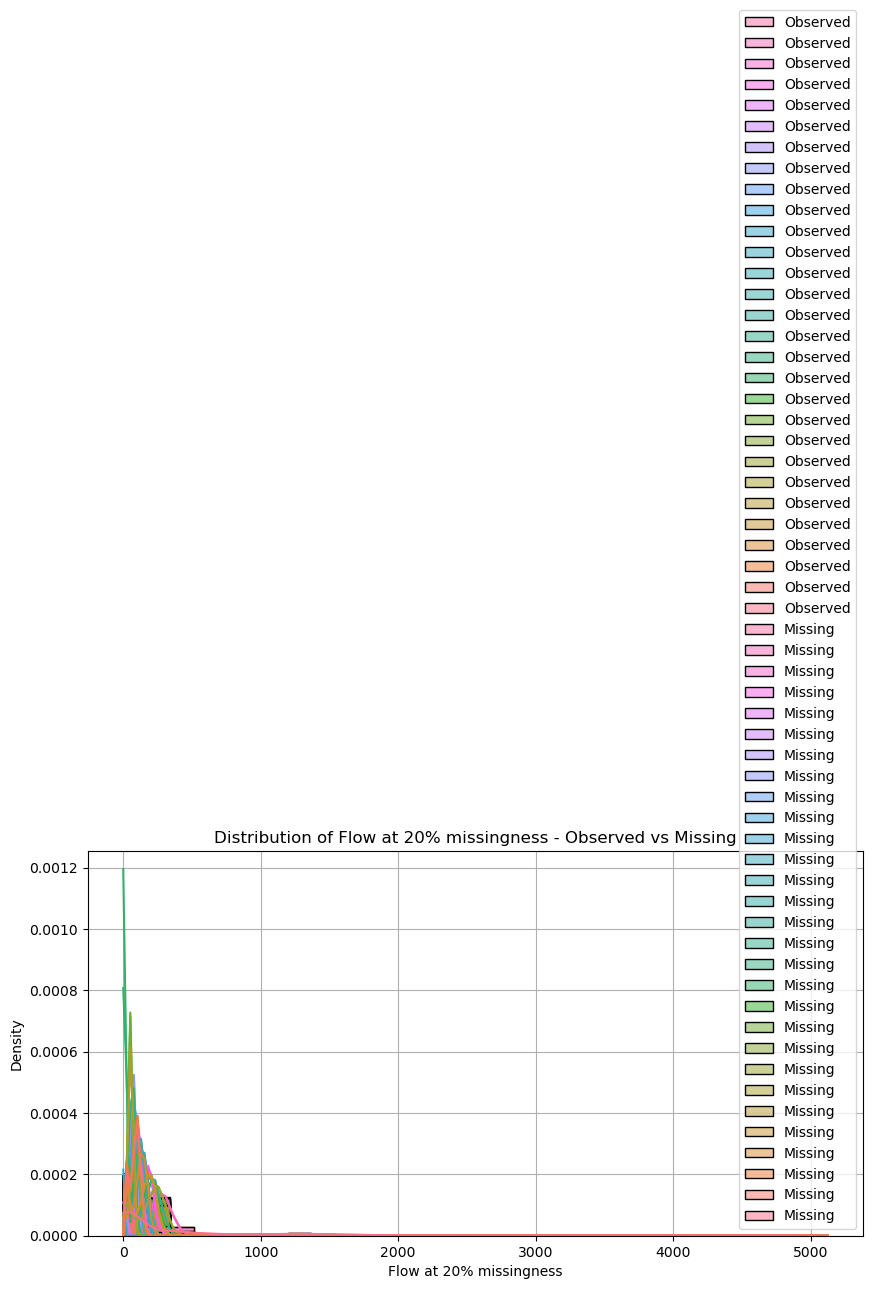

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_missing_vs_observed(data, mask, feature_name="flow"):
    """
    data: 1D array of original values
    mask: 1D boolean array, True if missing
    feature_name: for labeling
    """
    data_missing = data[mask]
    data_observed = data[~mask]

    plt.figure(figsize=(10, 5))
    sns.histplot(data_observed, color='blue', label='Observed', kde=True, stat="density", bins=30)
    sns.histplot(data_missing, color='red', label='Missing', kde=True, stat="density", bins=30)
    plt.title(f"Distribution of {feature_name} - Observed vs Missing")
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_missing_vs_observed(X_val_full_unscaled[0], val_masks[0][90], feature_name="Flow at 20% missingness")

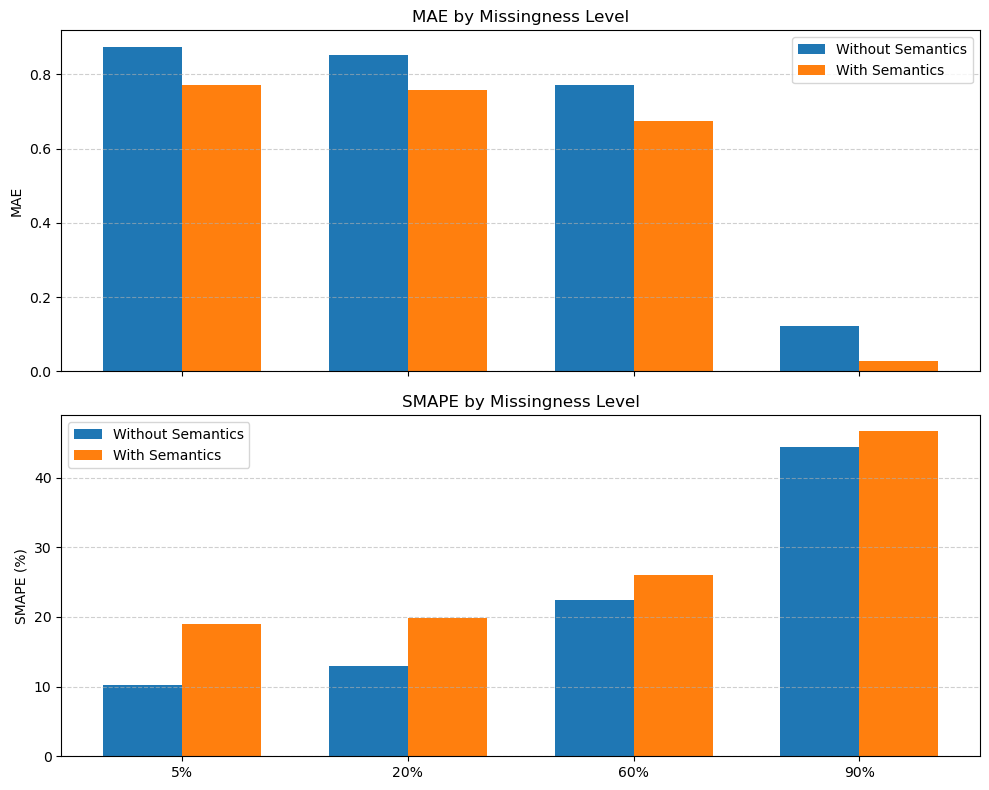

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Missingness levels
missing_levels = ['5%', '20%', '60%', '90%']

# Bar chart setup
x = np.arange(len(missing_levels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- MAE plot ---
ax[0].bar(x - width/2, r2_all.values(), width, label='Without Semantics', color='tab:blue')
ax[0].bar(x + width/2, avg_r2_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[0].set_ylabel('MAE')
ax[0].set_title('MAE by Missingness Level')
ax[0].legend()
ax[0].grid(True, axis='y', linestyle='--', alpha=0.6)

# --- SMAPE plot ---
ax[1].bar(x - width/2, smape_all.values(), width, label='Without Semantics', color='tab:blue')
ax[1].bar(x + width/2, avg_smape_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[1].set_ylabel('SMAPE (%)')
ax[1].set_title('SMAPE by Missingness Level')
ax[1].set_xticks(x)
ax[1].set_xticklabels(missing_levels)
ax[1].legend()
ax[1].grid(True, axis='y', linestyle='--', alpha=0.6)

fig.tight_layout()
plt.show()
